In [1]:
import numpy as np
import matplotlib.pyplot as plt

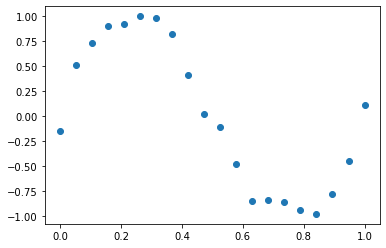

In [8]:
data_size = 20
X = np.linspace(0, 1, data_size)
noise = np.random.uniform(low=-1.0, high=1.0, size=data_size) * 0.2
y = np.sin(2.0 * np.pi * X) + noise
plt.scatter(X, y)

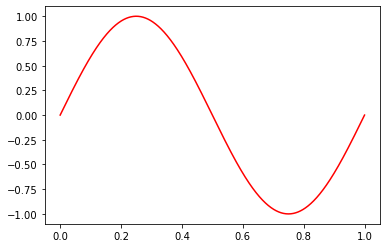

In [40]:
X_line = np.linspace(0, 1, 1000)
sin_X = np.sin(2.0 * np.pi * X_line)
plt.plot(X_line, sine_X, 'red')

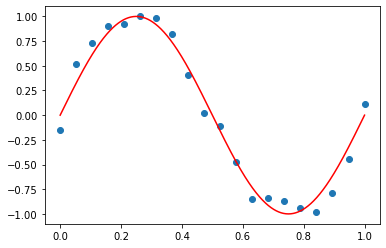

In [22]:
def plot_sin():
    plt.scatter(X, y)
    plt.plot(X_line, sine_X, 'red')

plot_sin()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lin_reg = LinearRegression().fit(X.reshape(-1, 1), y)

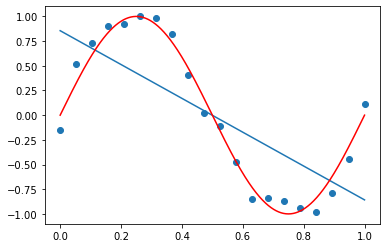

In [23]:
plt.plot(X_line, lin_reg.intercept_ + lin_reg.coef_ * X_line)
plot_sin()

In [24]:
X_2 = X ** 2

In [25]:
X_new = np.concatenate([X.reshape(-1, 1), X_2.reshape(-1, 1)], axis=1)
X_new

array([[0.        , 0.        ],
       [0.05263158, 0.00277008],
       [0.10526316, 0.01108033],
       [0.15789474, 0.02493075],
       [0.21052632, 0.04432133],
       [0.26315789, 0.06925208],
       [0.31578947, 0.09972299],
       [0.36842105, 0.13573407],
       [0.42105263, 0.17728532],
       [0.47368421, 0.22437673],
       [0.52631579, 0.27700831],
       [0.57894737, 0.33518006],
       [0.63157895, 0.39889197],
       [0.68421053, 0.46814404],
       [0.73684211, 0.54293629],
       [0.78947368, 0.6232687 ],
       [0.84210526, 0.70914127],
       [0.89473684, 0.80055402],
       [0.94736842, 0.89750693],
       [1.        , 1.        ]])

In [26]:
lin_reg2 = LinearRegression().fit(X_new, y)

In [27]:
lin_reg2.intercept_, lin_reg2.coef_

(0.8554706023704705, array([-1.71318894e+00, -1.72858598e-04]))

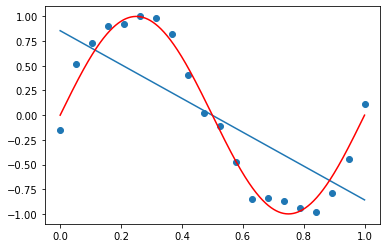

In [29]:
plt.plot(X_line, lin_reg2.intercept_ + lin_reg2.coef_[0] * X_line + lin_reg2.coef_[1] * X_line ** 2)
plot_sin()

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(degree=3)
poly.fit(X.reshape(-1, 1))
X_poly3 = poly.transform(X.reshape(-1, 1))
X_poly3

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.26315789e-02, 2.77008310e-03, 1.45793847e-04],
       [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03],
       [1.00000000e+00, 1.57894737e-01, 2.49307479e-02, 3.93643388e-03],
       [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03],
       [1.00000000e+00, 2.63157895e-01, 6.92520776e-02, 1.82242309e-02],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02],
       [1.00000000e+00, 3.68421053e-01, 1.35734072e-01, 5.00072897e-02],
       [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02],
       [1.00000000e+00, 4.73684211e-01, 2.24376731e-01, 1.06283715e-01],
       [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01],
       [1.00000000e+00, 5.78947368e-01, 3.35180055e-01, 1.94051611e-01],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01],
       [1.00000000e+00, 6.84210526e-01, 4.68144044e

In [34]:
lin_reg3 = LinearRegression().fit(X_poly3, y)

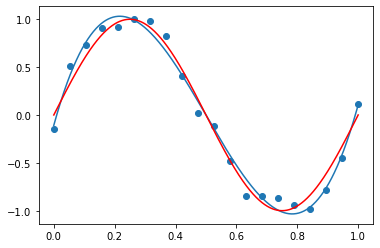

In [35]:
X_line_poly3 = poly.fit_transform(X_line.reshape(-1, 1))
plt.plot(X_line, lin_reg3.predict(X_line_poly3))
plot_sin()

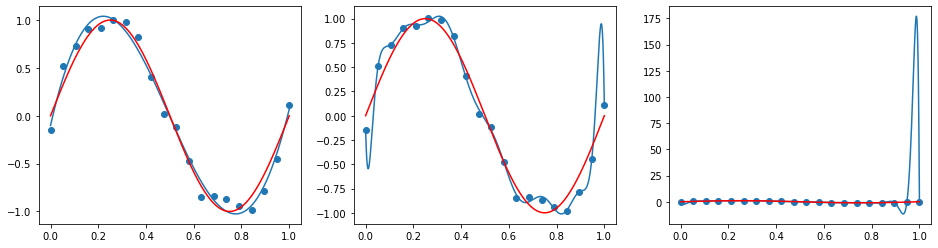

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for degree, ax in zip([5, 15, 25], axes):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    lin_reg = LinearRegression().fit(X_poly, y)
    X_line_poly = poly.fit_transform(X_line.reshape(-1, 1))
    ax.plot(X_line, lin_reg.predict(X_line_poly))
    ax.scatter(X, y)
    ax.plot(X_line, sin_X, 'red')
    

In [43]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split

In [44]:
X, y = mglearn.datasets.load_extended_boston()

In [45]:
X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 2.87987643e-02]])

In [46]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [47]:
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

In [48]:
df_X

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,...,0.026936,0.146662,0.162090,0.035958,0.798551,0.882553,0.195787,0.975392,0.216382,0.048003
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.033286,0.798551,0.893617,0.181239,1.000000,0.202815,0.041134
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.017707,0.798551,0.893617,0.096414,1.000000,0.107892,0.011641
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,...,0.026936,0.146662,0.162694,0.021512,0.798551,0.885843,0.117127,0.982677,0.129930,0.017180


In [49]:
df_y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [51]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [60]:
def print_score(model):
    print("{}, {}".format(model.score(X_train, y_train), model.score(X_test, y_test)))

print_score(lin_reg)

0.9520519609032729, 0.6074721959665745


In [54]:
from sklearn.linear_model import Ridge, Lasso

In [55]:
ridge = Ridge().fit(X_train, y_train)

In [61]:
print_score(ridge)

0.8857966585170942, 0.7527683481744756


In [62]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print_score(ridge10)

0.7882787115369615, 0.6359411489177311


In [63]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print_score(ridge01)

0.9282273685001982, 0.772206793647994


In [64]:
coefficients = pd.DataFrame({
    'lin_reg': lin_reg.coef_,
    'redge': ridge.coef_,
    'redge10': ridge10.coef_,
    'redge01': ridge01.coef_,
})

In [65]:
coefficients

,lin_reg,redge,redge10,redge01
0,-412.710947,-1.413684,-0.811610,-2.333007
1,-52.243207,-1.556619,0.647609,-5.441929
2,-131.898815,-1.465434,-0.809783,-6.128655
3,-12.004136,-0.126616,0.311335,-0.778525
4,-15.510713,-0.079119,-0.684624,1.291530
...,...,...,...,...
99,35.361714,-2.361124,-1.769550,-0.559662
100,11.955343,0.043467,-2.036371,4.947479
101,0.677026,1.208860,1.079849,2.667765
102,2.734520,-6.325992,-3.952641,-6.907626


In [66]:
lasso = Lasso().fit(X_train, y_train)

In [67]:
print_score(lasso)

0.29323768991114607, 0.20937503255272294


In [71]:
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

In [72]:
print_score(lasso001)

0.8962226511086501, 0.7656571174549989


In [75]:
coefficients_lasso = pd.DataFrame({
    'lin_reg': lin_reg.coef_,
    'lasso': lasso.coef_,
    'lasso001': lasso001.coef_,
})

In [76]:
coefficients_lasso

,lin_reg,lasso,lasso001
0,-412.710947,-0.0,-0.000000
1,-52.243207,0.0,-0.000000
2,-131.898815,-0.0,-0.000000
3,-12.004136,0.0,0.000000
4,-15.510713,-0.0,-0.000000
...,...,...,...
99,35.361714,-0.0,0.000000
100,11.955343,-0.0,-0.000000
101,0.677026,0.0,0.344041
102,2.734520,-0.0,-8.246456
